# Unveiling the Upwork Data Science Job Market: Insights on Demand and Supply


## Dataset Description

### Title: Upwork Jobs Dataset

### Source: Publicly available kaggle

### Scraped and Uploaded By: Hashir Omer

### Dataset Size: Approximately 1 MB (based on provided download size)

### Dataset Content:

The dataset is a curated sample of around 9500 job postings from Upwork.com.
This sample represents approximately 6.25% of the total jobs available on Upwork at the time of scraping.
No specific filters were applied during the scraping process to avoid biasing the dataset, ensuring a broad representation of job listings.

# Problem Statement:

### This project aims to analyze Upwork job postings specifically for data science-related roles to determine:

- The most demanded roles within the data science category.

- The roles that get paid the most.

- The role where hirer spent most.

- What is the most popular payment type ?

- What is most the required experienced level ?

- Which country has the highest demand ?

- Analyze the satifaction of freelancers by service

- Analyze the average connect price





In [1]:
url_1 = r"C:\Users\user\Desktop\Upwork Project\1_3_2023_general.csv"
url_2 = r"C:\Users\user\Desktop\Upwork Project\1_6_2023_general.csv"
url_3 = r"C:\Users\user\Desktop\Upwork Project\1_1_2023_general.csv"

In [2]:
import pandas as pd 
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",20)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv(url_1)
df2 = pd.read_csv(url_2)
df3 = pd.read_csv(url_3)

In [4]:
def clean(data):
    data = data.copy()
    print(f"The columns in the dataframe: {data.columns}")
    data.columns = data.columns.str.strip()
    data.columns = data.columns.str.lower()
    data.columns = data.columns.str.replace(" ","_") 
    
    print()
    print(f"The shape of the dataset is {data.shape}")
    print()
    print("The Structure and datatypes in the dataframe")
    print(data.info())
    print()
    print(f'There are {data.duplicated().sum()} duplicated rows in the dataset')
    if data.duplicated().sum() > 0:
        data.drop_duplicates(inplace=True)
        print('The duplicated row has been removed')
    else:
        None

    print()
    print("The Missing Values in the dataset")
    print(data.isna().sum())
    print()
    for column, values in data.isna().sum().items():
        if values > 0:
            print(f"{column} is having {values} missing values")

    print()

    
    return data

In [5]:
clean(df1)
clean(df2)
clean(df3)

The columns in the dataframe: Index(['connect_price', 'created_on', 'tz_date', 'duration', 'engagement',
       'enterprise_job', 'freelancers_to_hire', 'amount_amount', 'hourly_rate',
       'type', 'job_ts', 'proposals_tier', 'published_on', 'renewed_on',
       'tier', 'title', 'total_freelancers_to_hire', 'uid',
       'client_company_org_uid', 'client_total_feedback',
       'client_total_reviews', 'client_total_spent', 'weekly_budget_amount',
       'weekly_budget_currency_code', 'client_location_country',
       'occupations_category_pref_label', 'occupations_oservice_pref_label'],
      dtype='object')

The shape of the dataset is (4996, 27)

The Structure and datatypes in the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   connect_price                    4996 non-null   int64  
 1 

,connect_price,created_on,tz_date,duration,engagement,freelancers_to_hire,amount_amount,hourly_rate,type,job_ts,proposals_tier,published_on,renewed_on,tier,title,total_freelancers_to_hire,uid,client_company_org_uid,client_payment_verification_status,client_total_feedback,client_total_reviews,client_total_spent,client_location_country,occupations_category_pref_label,occupations_oservice_pref_label
0,6,2023-01-01T17:33:29Z,2023-01-01T17:33:29Z,More than 6 months,30+ hrs/week,1,NaN,30.0,hourly,1672594409972,Less than 5,2023-01-01T17:33:29Z,NaN,Intermediate,Zoom Webinar,1,1609603731584323584,1608471451601813505,1.0,0.000000,0,0.00,Canada,Translation,Live Interpretation
1,2,2023-01-01T17:38:19Z,2023-01-01T17:38:19Z,Less than 1 month,NaN,1,30.0,NaN,fixed_budget,1672594699447,Less than 5,2023-01-01T17:38:19Z,NaN,Expert,A page for a comic book (Page 9),1,1609604946319015936,826145256945999872,1.0,5.000000,20,3817.42,United States,Design & Creative,Cartoons & Comics
2,4,2023-01-01T17:38:17Z,2023-01-01T17:38:17Z,Less than 1 month,NaN,1,100.0,NaN,fixed_budget,1672594697764,Less than 5,2023-01-01T17:38:17Z,NaN,Expert,Looking for a graphic designer to brainstorm a...,1,1609604938732384256,1608183213743005696,1.0,5.000000,1,50.00,United States,Design & Creative,Graphic Design
3,2,2023-01-01T17:38:03Z,2023-01-01T17:38:03Z,3 to 6 months,NaN,1,500.0,NaN,fixed_budget,1672594683145,Less than 5,2023-01-01T17:38:03Z,NaN,Intermediate,"Local Business, Lead Gen, Paid Advertising Exp...",1,1609601320662839296,1609595819727970305,2.0,0.000000,0,0.00,Sweden,Sales & Marketing,Social Media Marketing
4,4,2023-01-01T17:37:54Z,2023-01-01T17:37:54Z,1 to 3 months,NaN,5,350.0,NaN,fixed_budget,1672594674356,Less than 5,2023-01-01T17:37:54Z,NaN,Entry level,B2B TeleSales,5,1609604840953905152,1609320405007642625,1.0,0.000000,0,0.00,United Kingdom,Sales & Marketing,Telemarketing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,2,2022-12-31T04:00:55Z,2022-12-31T04:00:55Z,Less than 1 month,NaN,1,40.0,NaN,fixed_budget,1672459255936,15 to 20,2022-12-31T04:00:55Z,NaN,Expert,Landing Page Design,1,1609036854057582592,1006145525553672192,1.0,4.843860,17,680.30,India,"Web, Mobile & Software Dev",Web Design
4991,6,2022-12-31T04:00:26Z,2022-12-31T04:00:26Z,1 to 3 months,30+ hrs/week,1,NaN,NaN,no_budget,1672459226428,5 to 10,2022-12-31T04:00:26Z,NaN,Expert,Romance Fiction Ghost Writer,1,1609036730629492736,603386244065271808,1.0,4.686411,47,3911.28,United States,Writing,Ghostwriting
4992,2,2022-12-31T04:00:17Z,2022-12-31T04:00:17Z,Less than 1 month,Less than 30 hrs/week,0,NaN,NaN,no_budget,1672459217451,20 to 50,2022-12-31T04:00:17Z,NaN,Intermediate,Google Analytics &amp; Wordpress keywords,0,1608991391016947712,1608907813676167169,1.0,0.000000,0,0.00,United States,Sales & Marketing,SEO
4993,6,2022-12-31T04:00:17Z,2022-12-31T04:00:17Z,1 to 3 months,Less than 30 hrs/week,1,NaN,7.5,hourly,1672459217393,10 to 15,2022-12-31T04:00:17Z,NaN,Intermediate,Google Sheets/forms/apps script expert,1,1609036692505575424,1431272659639001088,1.0,4.896340,12,1609.21,United States,"Web, Mobile & Software Dev",Scripting & Automation


In [6]:
# Step 1: Concatenate the dataframes
df_combined = pd.concat([df1, df2, df3], ignore_index=True)

# Step 2: Remove duplicate rows
df_combined.drop_duplicates(inplace=True)

# Step 3: Handle missing values

# Dropping columns with more than 90% missing values
threshold = 0.9
df_combined = df_combined.loc[:, df_combined.isnull().mean() < threshold]

# Filling missing values for numeric columns with the median
numeric_cols = df_combined.select_dtypes(include=['float64', 'int64']).columns
df_combined[numeric_cols] = df_combined[numeric_cols].fillna(df_combined[numeric_cols].median())

# Filling missing values for categorical columns with the mode
categorical_cols = df_combined.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    df_combined[col] = df_combined[col].fillna(df_combined[col].mode()[0])

# Step 4: Ensure correct data types
# Convert date columns to datetime
date_cols = ['created_on', 'tz_date', 'published_on', 'renewed_on']
for col in date_cols:
    if col in df_combined.columns:
        df_combined[col] = pd.to_datetime(df_combined[col], errors='coerce')

# Convert boolean columns
bool_cols = ['enterprise_job']
for col in bool_cols:
    if col in df_combined.columns:
        df_combined[col] = df_combined[col].astype(bool)

# Convert other categorical columns to category data type
categorical_cols = ['type', 'proposals_tier', 'tier', 'client_location_country', 'occupations_category_pref_label', 'occupations_oservice_pref_label']
for col in categorical_cols:
    if col in df_combined.columns:
        df_combined[col] = df_combined[col].astype('category')

# Check the cleaned dataframe
print(df_combined.info())
print(df_combined.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 14737 entries, 0 to 14980
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   connect_price                       14737 non-null  int64              
 1   created_on                          14737 non-null  datetime64[ns, UTC]
 2   tz_date                             14737 non-null  datetime64[ns, UTC]
 3   duration                            14737 non-null  object             
 4   engagement                          14737 non-null  object             
 5   enterprise_job                      14737 non-null  bool               
 6   freelancers_to_hire                 14737 non-null  int64              
 7   amount_amount                       14737 non-null  float64            
 8   hourly_rate                         14737 non-null  float64            
 9   type                                14737 no

In [7]:
data = df_combined

In [8]:
len(data)

14737

In [9]:
data.shape

(14737, 25)

In [10]:
data.columns

Index(['connect_price', 'created_on', 'tz_date', 'duration', 'engagement',
       'enterprise_job', 'freelancers_to_hire', 'amount_amount', 'hourly_rate',
       'type', 'job_ts', 'proposals_tier', 'published_on', 'tier', 'title',
       'total_freelancers_to_hire', 'uid', 'client_company_org_uid',
       'client_total_feedback', 'client_total_reviews', 'client_total_spent',
       'client_location_country', 'occupations_category_pref_label',
       'occupations_oservice_pref_label',
       'client_payment_verification_status'],
      dtype='object')

In [11]:
df = data[['connect_price','duration','engagement','amount_amount','hourly_rate','type', 'tier','client_total_feedback','client_total_reviews','client_total_spent','client_location_country','occupations_category_pref_label','occupations_oservice_pref_label','client_payment_verification_status']]

In [12]:
df.columns

Index(['connect_price', 'duration', 'engagement', 'amount_amount',
       'hourly_rate', 'type', 'tier', 'client_total_feedback',
       'client_total_reviews', 'client_total_spent', 'client_location_country',
       'occupations_category_pref_label', 'occupations_oservice_pref_label',
       'client_payment_verification_status'],
      dtype='object')

In [13]:
df

,connect_price,duration,engagement,amount_amount,hourly_rate,type,tier,client_total_feedback,client_total_reviews,client_total_spent,client_location_country,occupations_category_pref_label,occupations_oservice_pref_label,client_payment_verification_status
0,6,3 to 6 months,Less than 30 hrs/week,100.0,30.0,hourly,Expert,5.000000,22,46168.57,Lithuania,Translation,General Translation Services,1.0
1,4,Less than 1 month,Less than 30 hrs/week,150.0,20.0,fixed_budget,Expert,4.893378,16,7754.00,Singapore,Admin Support,Market Research,1.0
2,4,Less than 1 month,Less than 30 hrs/week,100.0,20.0,fixed_budget,Intermediate,5.000000,11,2005.00,Mauritania,Engineering & Architecture,Interior Design,1.0
3,6,More than 6 months,Less than 30 hrs/week,1000.0,20.0,fixed_budget,Entry level,0.000000,0,0.00,India,"Web, Mobile & Software Dev",UX/UI Design,1.0
4,6,More than 6 months,30+ hrs/week,100.0,8.5,hourly,Expert,4.958659,3,1200.68,Colombia,"Web, Mobile & Software Dev",Front-End Development,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14976,2,Less than 1 month,Less than 30 hrs/week,40.0,20.0,fixed_budget,Expert,4.843860,17,680.30,India,"Web, Mobile & Software Dev",Web Design,1.0
14977,6,1 to 3 months,30+ hrs/week,100.0,20.0,no_budget,Expert,4.686411,47,3911.28,United States,Writing,Ghostwriting,1.0
14978,2,Less than 1 month,Less than 30 hrs/week,100.0,20.0,no_budget,Intermediate,0.000000,0,0.00,United States,Sales & Marketing,SEO,1.0
14979,6,1 to 3 months,Less than 30 hrs/week,100.0,7.5,hourly,Intermediate,4.896340,12,1609.21,United States,"Web, Mobile & Software Dev",Scripting & Automation,1.0


In [14]:
## checking the unqiue job labels 
df["occupations_oservice_pref_label"].nunique()

208

In [15]:
## listing the unique service labels 
df["occupations_oservice_pref_label"].value_counts().reset_index()

,occupations_oservice_pref_label,count
0,Full Stack Development,955
1,Graphic Design,849
2,Social Media Marketing,822
3,General Virtual Assistance,659
4,Video Editing,595
...,...,...
203,Qualitative Research,1
204,Legal Virtual Assistance,1
205,Legal Writing,1
206,Pattern Design,1


In [16]:
# Convert necessary columns to category dtype
df['type'] = df['type'].astype('category')
df['tier'] = df['tier'].astype('category')
df['client_location_country'] = df['client_location_country'].astype('category')
df['occupations_category_pref_label'] = df['occupations_category_pref_label'].astype('category')
df['occupations_oservice_pref_label'] = df['occupations_oservice_pref_label'].astype('category')

# Filtering out the data analytics and data science labels from the listing
new_df = df[df['occupations_category_pref_label'] == 'Data Science & Analytics']


C:\Users\user\AppData\Local\Temp\ipykernel_2484\2338635688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_2484\2338635688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tier'] = df['tier'].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_2484\2338635688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [17]:
new_df.columns

Index(['connect_price', 'duration', 'engagement', 'amount_amount',
       'hourly_rate', 'type', 'tier', 'client_total_feedback',
       'client_total_reviews', 'client_total_spent', 'client_location_country',
       'occupations_category_pref_label', 'occupations_oservice_pref_label',
       'client_payment_verification_status'],
      dtype='object')

In [18]:
## renaming the columns
new_column_names = {
    'connect_price': 'Connect Price',
    'duration': 'Duration',
    'engagement': 'Engagement',
    'amount_amount': 'Amount',
    'hourly_rate': 'Hourly Rate',
    'type': 'Type',
    'tier': 'Experience Level',
    'client_total_feedback': 'Total Feedback',
    'client_total_reviews': 'Total Reviews',
    'client_total_spent': 'Total Spent',
    'client_location_country': 'Country',
    'occupations_category_pref_label': 'Category',
    'occupations_oservice_pref_label': 'Service',
    'client_payment_verification_status': 'Payment Verification Status'
}

# Rename the columns in the dataframe
new_df.rename(columns=new_column_names, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2484\2316839301.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns=new_column_names, inplace=True)


In [19]:
df1 = new_df.reset_index(drop=True)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Connect Price                472 non-null    int64   
 1   Duration                     472 non-null    object  
 2   Engagement                   472 non-null    object  
 3   Amount                       472 non-null    float64 
 4   Hourly Rate                  472 non-null    float64 
 5   Type                         472 non-null    category
 6   Experience Level             472 non-null    category
 7   Total Feedback               472 non-null    float64 
 8   Total Reviews                472 non-null    int64   
 9   Total Spent                  472 non-null    float64 
 10  Country                      472 non-null    category
 11  Category                     472 non-null    category
 12  Service                      472 non-null    category
 13  Payme

In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Connect Price,472.0,3.616525,1.690231,1.0,2.000000,4.000000,6.000000,6.00
Amount,472.0,188.860169,782.811123,5.0,100.000000,100.000000,100.000000,15000.00
Hourly Rate,472.0,25.101695,17.528692,3.0,20.000000,20.000000,22.500000,280.00
Total Feedback,472.0,3.730669,2.043990,0.0,4.055753,4.899988,4.998349,5.00
Total Reviews,472.0,33.671610,85.112765,0.0,1.000000,6.000000,29.000000,918.00
Total Spent,472.0,38226.095530,143759.965070,0.0,151.687500,2081.925000,14336.735000,1673926.21
Payment Verification Status,472.0,1.055085,0.228388,1.0,1.000000,1.000000,1.000000,2.00


# Data Analysis and Visualization

In [22]:
# Analyze demand for each data science role

# Remove unused categories
df1['Category'] = df1['Category'].astype('category').cat.remove_unused_categories()
df1['Service'] = df1['Service'].astype('category').cat.remove_unused_categories()

# Verify the changes
print(df1['Category'].unique())

# Analyze demand for each data science role
demand_stats = df1['Service'].value_counts().reset_index()
demand_stats.columns = ['Service', 'count']

# Sort the dataframe by 'count' in descending order to get top 10 services
demand_df = demand_stats.sort_values(by='count', ascending=False)

demand_df

['Data Science & Analytics']
Categories (1, object): ['Data Science & Analytics']


,Service,count
0,Data Analytics,133
1,Data Extraction,107
2,Machine Learning,95
3,Data Visualization,55
4,Data Engineering,24
5,Deep Learning,24
6,Data Mining,17
7,Data Processing,12
8,A/B Testing,2
9,Experimentation & Testing,2


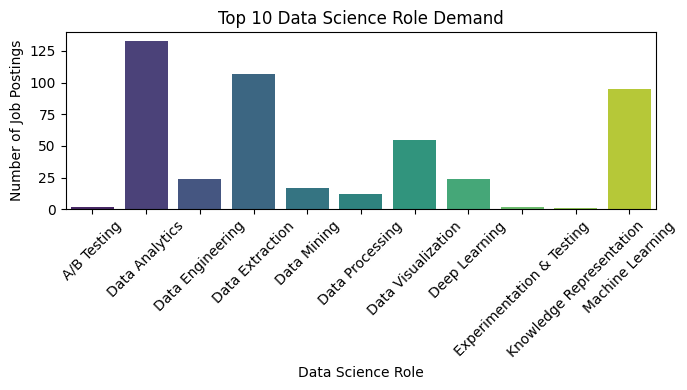

In [23]:
# Plotting using Seaborn and Matplotlib
plt.figure(figsize=(7, 4))
sns.barplot(data=demand_df, x='Service', y='count', palette='viridis')
plt.title('Top 10 Data Science Role Demand')
plt.xlabel('Data Science Role')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Data Analytics**: With 133 job postings, there is a notable demand for professionals skilled in data analytics, suggesting a strong need for analytical insights.

- **Data Extraction**: There are 107 job postings, indicating a significant demand for roles involving data extraction tasks, reflecting the need for gathering and processing large datasets.

- **Machine Learning**: 95 job postings highlight a substantial demand for expertise in machine learning, reflecting the growing importance of predictive modeling and algorithm development.

- **Data Visualization**: There are 55 job postings, indicating a considerable demand for professionals who can create insightful visual representations of data.

- **Data Engineering**: There are 24 job postings, indicating a specific demand for roles focused on data infrastructure, processing, and management.

- **Deep Learning**: 24 job postings highlight the need for specialists in deep learning, emphasizing the importance of neural networks and advanced machine learning techniques.

- **Data Mining**: With 17 job postings, there is a noticeable demand for roles focused on extracting useful information from large datasets.

- **Data Processing**: There are 12 job postings, indicating a demand for professionals skilled in processing and managing data efficiently.

- **A/B Testing**: With 2 job postings, there is a smaller but existing demand for expertise in A/B testing, crucial for optimizing business decisions and user experiences.

- **Experimentation & Testing**: 2 job postings reflect a niche but essential demand for roles centered on designing and conducting experiments to test hypotheses and validate results.

- **Knowledge Representation**: There is 1 job posting, indicating a very specific demand for professionals specializing in knowledge representation, critical for structuring and organizing information in AI systems.


In [24]:
## Analyze the Role that get paid most 
# Calculate average hourly rates for each service
payment_stats = df1.groupby('Service')['Hourly Rate'].mean().reset_index()
payment_stats.columns = ['Service', 'Average Hourly Rate']

# Sort by average hourly rate in descending order
payment_stats_sorted = payment_stats.sort_values(by='Average Hourly Rate', ascending=False).reset_index(drop=True).round(2)

payment_stats_sorted


,Service,Average Hourly Rate
0,A/B Testing,150.00
1,Data Processing,29.67
2,Deep Learning,28.56
3,Data Analytics,27.71
4,Data Engineering,25.69
5,Machine Learning,25.11
6,Data Visualization,24.98
7,Experimentation & Testing,20.00
8,Knowledge Representation,20.00
9,Data Extraction,19.55


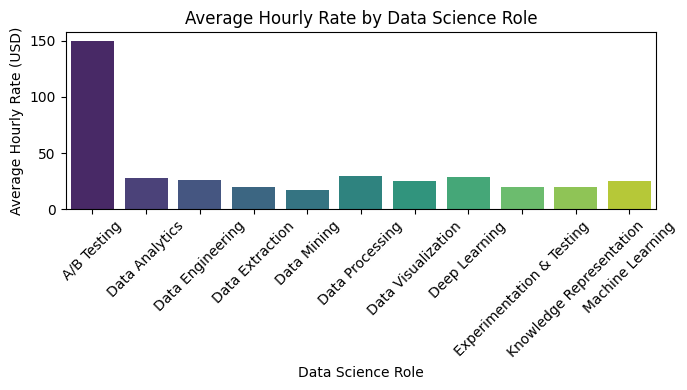

In [25]:
# Plotting using Seaborn and Matplotlib
plt.figure(figsize=(7, 4))
sns.barplot(data=payment_stats_sorted, x='Service', y='Average Hourly Rate', palette='viridis')
plt.title('Average Hourly Rate by Data Science Role')
plt.xlabel('Data Science Role')
plt.ylabel('Average Hourly Rate (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **A/B Testing**: The highest average hourly rate is $150.00, indicating that specialized skills in A/B testing are highly valued and command a premium pay rate.

- **Data Processing**: With an average hourly rate of $29.67, professionals in data processing are well-compensated for their ability to manage and process large datasets efficiently.

- **Deep Learning**: The average hourly rate for deep learning roles is $28.56, reflecting the advanced expertise required for neural networks and complex machine learning models.

- **Data Analytics**: With an average hourly rate of $27.71, data analytics professionals are in demand for their ability to derive insights from data.

- **Data Engineering**: The average hourly rate for data engineering roles is $25.69, indicating the importance of building and maintaining robust data infrastructure.

- **Machine Learning**: Professionals in machine learning earn an average hourly rate of $25.11, showcasing the value of predictive modeling and algorithm development skills.

- **Data Visualization**: With an average hourly rate of $24.98, experts in data visualization are compensated for their ability to create meaningful visual representations of data.

- **Experimentation & Testing**: The average hourly rate is $20.00, highlighting the specialized skills required for rigorous experimentation and testing.

- **Knowledge Representation**: Professionals in knowledge representation earn an average hourly rate of $20.00, reflecting the niche expertise required to structure and organize information in AI systems.

- **Data Extraction**: With an average hourly rate of $19.55, data extraction roles are essential for gathering and preparing large datasets.

- **Data Mining**: The average hourly rate for data mining roles is $17.24, indicating the value of extracting useful patterns from large datasets.

In [26]:
## The role that hirer spent most on 
spent_stats = df1.groupby('Service')['Total Spent'].mean().sort_values(ascending=False).reset_index()
spent_stats.columns = ['Service', 'Average Total Spent']
spent_stats




,Service,Average Total Spent
0,Data Engineering,111057.562083
1,Data Analytics,71623.965188
2,Data Processing,43111.421667
3,Experimentation & Testing,26527.895000
4,Machine Learning,23158.222947
5,Data Visualization,17997.002909
6,Data Extraction,16270.384393
7,Deep Learning,9514.502917
8,Data Mining,7105.843529
9,Knowledge Representation,1010.500000


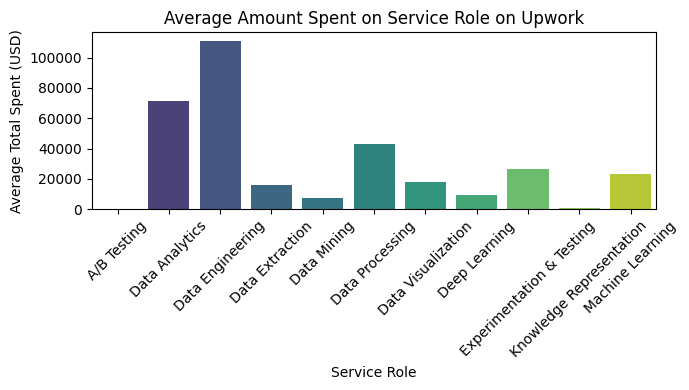

In [82]:
# Plotting using Seaborn and Matplotlib
plt.figure(figsize=(7, 4))
sns.barplot(data=spent_stats, x='Service', y='Average Total Spent', palette='viridis')
plt.title('Average Amount Spent on Service Role on Upwork')
plt.xlabel('Service Role')
plt.ylabel('Average Total Spent (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Data Engineering**: Hirers spend an average of $111,057.56 on Data Engineering projects, highlighting substantial investment in data infrastructure and management.

- **Data Analytics**: With an average spending of $71,623.97 on Data Analytics projects, there is significant investment in deriving insights from data.

- **Data Processing**: Hirers spend an average of $43,111.42 on Data Processing projects, indicating investment in efficient data management and processing.

- **Experimentation & Testing**: The average spending on Experimentation & Testing projects is $26,527.90, reflecting investment in validating hypotheses and results.

- **Machine Learning**: With an average spending of $23,158.22 on Machine Learning projects, there is investment in predictive modeling and algorithm development.

- **Data Visualization**: Hirers spend an average of $17,997.00 on Data Visualization projects, emphasizing investment in creating visual representations of data.

- **Data Extraction**: With an average spending of $16,270.38 on Data Extraction projects, there is investment in gathering and processing large datasets.

- **Deep Learning**: The average spending on Deep Learning projects is $9,514.50, indicating investment in advanced neural network and AI model development.

- **Data Mining**: Hirers spend an average of $7,105.84 on Data Mining projects, highlighting investment in extracting useful patterns from data.

- **Knowledge Representation**: There is an average spending of $1,010.50 on Knowledge Representation projects, reflecting a niche demand for organizing information in AI systems.

- **A/B Testing**: Hirers spend an average of $0.00 on A/B Testing projects, indicating a specialized but lesser demand for optimizing business decisions and user experiences.

In [28]:
## Analyse the most popular payment type 
# Calculate value counts for 'Type'
type_count = df1['Type'].value_counts().sort_values(ascending=False).reset_index()
type_count

,Type,count
0,fixed_budget,215
1,hourly,189
2,no_budget,68


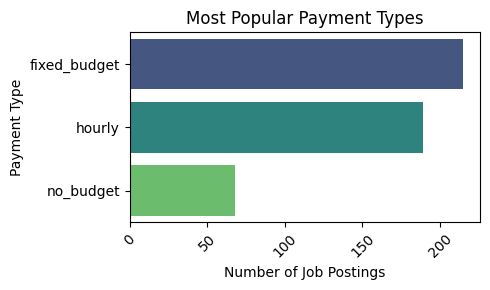

In [49]:
# Plotting using Seaborn
plt.figure(figsize=(5, 3))
sns.barplot(data=type_count, y='Type', x='count', palette='viridis')
plt.title('Most Popular Payment Types')
plt.ylabel('Payment Type')
plt.xlabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Fixed Budget:** There are 215 job postings that specify a fixed budget, indicating a preference for setting a predetermined cost for the project.

- **Hourly:** With 189 job postings based on hourly rates, there is a significant demand for jobs paid on an hourly basis, allowing flexibility in billing based on time spent.

- **No Budget:** There are 68 job postings where no specific budget is mentioned upfront, suggesting a need for negotiation or a flexible payment structure.

This breakdown highlights the distribution of job types based on payment terms in your dataset.

In [30]:
## Analyse the most  required experience level  
# Calculate value counts for 'Experience Level'
experience_count = df1['Experience Level'].value_counts().sort_values(ascending=False).reset_index()
experience_count

,Experience Level,count
0,Intermediate,249
1,Expert,164
2,Entry level,59


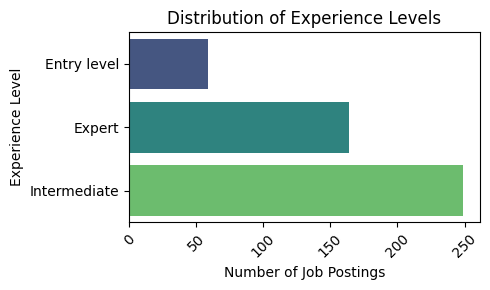

In [50]:
# Plotting using Seaborn
plt.figure(figsize=(5, 3))
sns.barplot(data=experience_count, y='Experience Level', x='count', palette='viridis')
plt.title('Distribution of Experience Levels')
plt.ylabel('Experience Level')
plt.xlabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Intermediate:** There are 249 job postings that require intermediate experience level, indicating a significant demand for professionals with moderate expertise.
  
- **Expert:** With 164 job postings seeking expert-level skills, there is a notable demand for highly skilled professionals in specialized roles.
  
- **Entry Level:** There are 59 job postings suitable for entry-level candidates, providing opportunities for newcomers to gain experience and start their careers in the field.

This breakdown highlights the distribution of experience levels required in job postings from your dataset.

In [44]:
## Analyze the most popular job duration 
most_duration = df1["Duration"].value_counts().reset_index()
most_duration

,Duration,count
0,Less than 1 month,284
1,1 to 3 months,116
2,More than 6 months,37
3,3 to 6 months,35


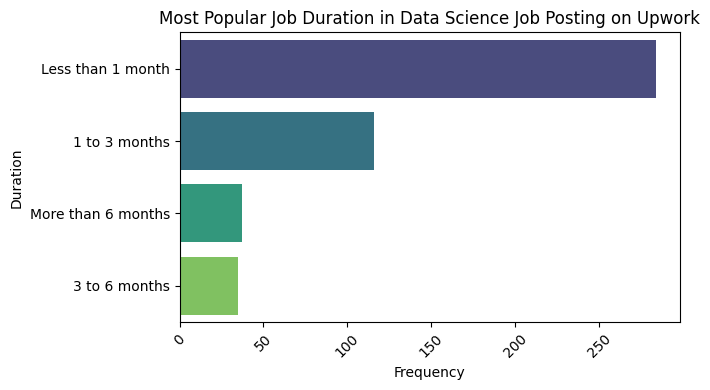

In [45]:
# Plotting using Seaborn
plt.figure(figsize=(7, 4))
sns.barplot(data=most_duration, x='count', y='Duration', palette='viridis')
plt.title('Most Popular Job Duration in Data Science Job Posting on Upwork')
plt.xlabel('Frequency')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
## Analyze country with the highest demand  
# Step 1: Calculate demand for each country
country_demand = df1['Country'].value_counts().reset_index().head(10)
country_demand.columns = ['Country', 'Demand']


# Filter to include only the top 10 countries
top_10_countries = country_demand.sort_values(by='Demand', ascending=False).head(10)

# Display the demand for the top 10 countries
print("Top 10 countries by demand:")
print(top_10_countries)


Top 10 countries by demand:
          Country  Demand
0   United States     157
1  United Kingdom      60
2           India      35
3          Canada      33
4       Australia      21
5        Pakistan      13
6          Israel      12
7         Germany      11
8          France       9
9     Netherlands       9


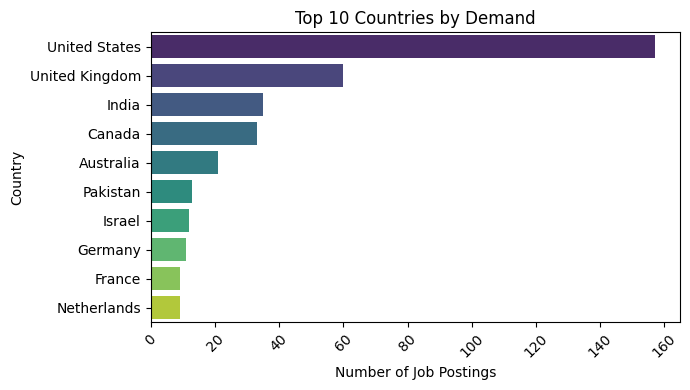

In [39]:
# Assuming you have already calculated and prepared country_demand DataFrame
country_demand = df1['Country'].value_counts().reset_index().head(10)
country_demand.columns = ['Country', 'Demand']

# Data for top 10 countries by demand
top_10_countries_data = {
    'Country': [
        'United States', 'United Kingdom', 'India', 'Canada', 'Australia',
        'Pakistan', 'Israel', 'Germany', 'France', 'Netherlands'
    ],
    'Demand': [157, 60, 35, 33, 21, 13, 12, 11, 9, 9]
}

# Create a DataFrame
top_10_countries_df = pd.DataFrame(top_10_countries_data)

# Create a bar plot for top 10 countries
plt.figure(figsize=(7, 4))
sns.barplot(x='Demand', y='Country', data=top_10_countries_df, palette='viridis')
plt.title('Top 10 Countries by Demand')
plt.xlabel('Number of Job Postings')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Observations
1. **Highest Demand**: The United States has the highest number of job postings at 157, indicating a strong demand for professionals.
2. **Significant Demand**: The United Kingdom follows with 60 job postings, showing substantial demand.
3. **Moderate Demand**: India, Canada, and Australia have a moderate number of job postings, ranging from 35 to 21.
4. **Lower Demand**: Pakistan, Israel, Germany, France, and the Netherlands have fewer job postings, ranging from 13 to 9, but still represent important markets for job opportunities. postings


In [63]:
## Analyze the Feedback from the job listings by freelancers 
job_rating = df1.groupby(['Service'])["Total Feedback"].mean().sort_values(ascending=False).reset_index().round(1)
job_rating


,Service,Total Feedback
0,Experimentation & Testing,5.0
1,Deep Learning,4.5
2,Data Visualization,4.2
3,Data Mining,4.0
4,Machine Learning,3.8
5,Data Analytics,3.7
6,Data Extraction,3.5
7,Data Processing,3.4
8,Data Engineering,3.2
9,Knowledge Representation,2.9


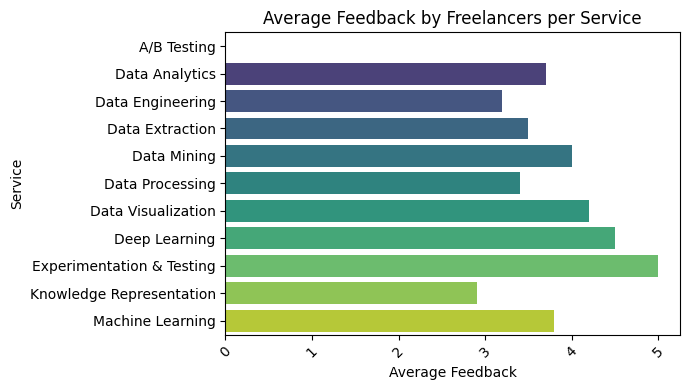

In [62]:
# Plotting using Seaborn
plt.figure(figsize=(7, 4))
sns.barplot(data=job_rating, x='Total Feedback', y='Service', palette='viridis')
plt.title('Average Feedback by Freelancers per Service')
plt.xlabel('Average Feedback')
plt.ylabel('Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Observations
1. **Highest Total Feedback**: Experimentation & Testing has the highest total feedback of 5.0, indicating high satisfaction and/or high engagement in this service.
2. **High Feedback**: Deep Learning and Data Visualization have high total feedback scores of 4.5 and 4.2 respectively, suggesting strong performance in these areas.
3. **Moderate Feedback**: Several services, including Data Mining, Machine Learning, Data Analytics, Data Extraction, and Data Processing, have moderate feedback scores ranging from 4.0 to 3.4.
4. **Lower Feedback**: Data Engineering, Knowledge Representation, and A/B Testing have lower feedback scores, with A/B Testing receiving no feedback, possibly indicating less engagement or lower satisfaction.

In [73]:
## Analyze the average connect price by services and by country 
average_connect_by_service = df1.groupby(["Service"])["Connect Price"].mean().sort_values(ascending=False).reset_index().round(0)
average_connect_by_service

,Service,Connect Price
0,Data Engineering,5.0
1,Experimentation & Testing,4.0
2,Knowledge Representation,4.0
3,Data Visualization,4.0
4,Machine Learning,4.0
5,Data Analytics,4.0
6,Deep Learning,4.0
7,Data Processing,3.0
8,Data Mining,3.0
9,Data Extraction,3.0


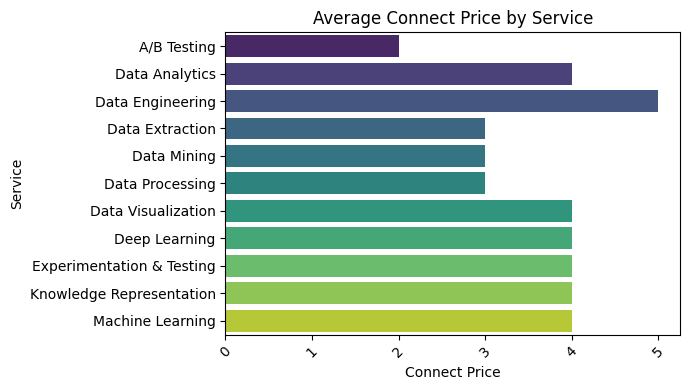

In [68]:
plt.figure(figsize=(7, 4))
sns.barplot(data=average_connect_by_service, x='Connect Price', y='Service', palette='viridis')
plt.title('Average Connect Price by Service')
plt.xlabel('Connect Price')
plt.ylabel('Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Observations
1. **Highest Connect Price**: Data Engineering commands the highest average connect price of 5.0, indicating a premium for expertise in this area.
2. **Moderate Connect Prices**: Several services, including Experimentation & Testing, Knowledge Representation, Data Visualization, Machine Learning, Data Analytics, and Deep Learning, have an average connect price of 4.0, suggesting a balanced demand and value for these skills.
3. **Lower Connect Prices**: Services like Data Processing, Data Mining, and Data Extraction have a lower average connect price of 3.0, while A/B Testing has the lowest at 2.0, indicating these services are valued less compared to others, possibly due to being more common or less specialized.

In [78]:
## Analyzing average connect price by country
average_connect_by_country = df1.groupby(["Country"])["Connect Price"].mean().sort_values(ascending=False).reset_index().round(0).head(20)


average_country_connect = {
    'Country': [
        'Mexico', 'Austria', 'Uzbekistan', 'Puerto Rico', 'Kuwait', 'Estonia', 'Saudi Arabia', 'Norway', 'Sweden', 'Czech Republic',
        'Hong Kong', 'Lithuania', 'Ukraine', 'Oman', 'Thailand', 'Ireland', 'Taiwan', 'Switzerland', 'Israel', 'South Africa'
    ],
    'Connect Price': [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
}

# Creating the second DataFrame
top_countries_connects = pd.DataFrame(average_country_connect)

top_countries_connects


,Country,Connect Price
0,Mexico,6.0
1,Austria,6.0
2,Uzbekistan,6.0
3,Puerto Rico,6.0
4,Kuwait,6.0
5,Estonia,6.0
6,Saudi Arabia,6.0
7,Norway,5.0
8,Sweden,5.0
9,Czech Republic,5.0


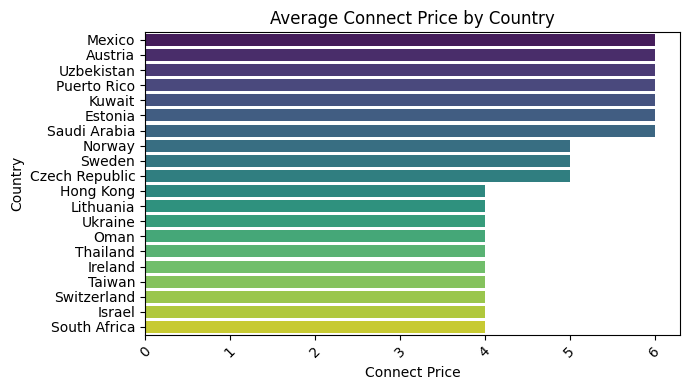

In [80]:
plt.figure(figsize=(7, 4))
sns.barplot(data=top_countries_connects, x='Connect Price', y='Country', palette='viridis')
plt.title('Average Connect Price by Country')
plt.xlabel('Connect Price')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Observations
1. **Highest Average Connect Price**: 6.0 in Mexico, Austria, Uzbekistan, Puerto Rico, Kuwait, Estonia, and Saudi Arabia.
2. **Moderate Connect Price**: 5.0 in Norway, Sweden, and Czech Republic.
3. **Lower Connect Price**: 4.0 in Hong Kong, Lithuania, Ukraine, Oman, Thailand, Ireland, Taiwan, Switzerland, Israel, and South Africa.